In [24]:
# Imports you'll need.
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import sys
import time
from TwitterAPI import TwitterAPI

In [25]:
#consumer_key = 'fixme'
consumer_key = 'Id0pbUg2MQPQlLp1HqVTE5XdB'
#consumer_secret = 'fixme'
consumer_secret = 'OJNSZfaplR2YsTUCsXnDfUfvI2JcPivlLiNDdjMIyKooaKZQAO'
#access_token = 'fixme'
access_token = '1086684450266771458-750WadbMNdZVuRNJ2iBUeSMTfBYNTW'
#access_token_secret = 'fixme'
access_token_secret = 'GeNLScNFJTGOeOh7wqJit2kurRvtqSiP7I2QIcfhZrnrX'

In [26]:
# This method is done for you.
def get_twitter():
    """ Construct an instance of TwitterAPI using the tokens you entered above.
    Returns:
      An instance of TwitterAPI.
    """
    return TwitterAPI(consumer_key, consumer_secret, access_token, access_token_secret)
    print(f"Connection Established")

In [27]:
def read_screen_names(filename):
    """
    Read a text file containing Twitter screen_names, one per line.

    Params:
        filename....Name of the file to read.
    Returns:
        A list of strings, one per screen_name, in the order they are listed
        in the file.

    Here's a doctest to confirm your implementation is correct.
    >>> read_screen_names('candidates.txt')
    ['DrJillStein', 'GovGaryJohnson', 'HillaryClinton', 'realDonaldTrump']
    """
    ###TODO
#     path = "C:/Users/sonal/Documents/sdeshpande3/a0/candidates.txt"
    x = open(filename, "r")
    return(x.read().split())

In [28]:
# I've provided the method below to handle Twitter's rate limiting.
# You should call this method whenever you need to access the Twitter API.
def robust_request(twitter, resource, params, max_tries=5):
    """ If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
      twitter .... A TwitterAPI object.
      resource ... A resource string to request; e.g., "friends/ids"
      params ..... A parameter dict for the request, e.g., to specify
                   parameters like screen_name or count.
      max_tries .. The maximum number of tries to attempt.
    Returns:
      A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print('Got error %s \nsleeping for 15 minutes.' % request.text)
            sys.stderr.flush()
#             time.sleep(61 * 15)
            time.sleep(61 * 2)

In [29]:
def get_users(twitter, screen_names):
    """Retrieve the Twitter user objects for each screen_name.
    Params:
        twitter........The TwitterAPI object.
        screen_names...A list of strings, one per screen_name
    Returns:
        A list of dicts, one per user, containing all the user information
        (e.g., screen_name, id, location, etc)

    See the API documentation here: https://dev.twitter.com/rest/reference/get/users/lookup

    In this example, I test retrieving two users: twitterapi and twitter.

    >>> twitter = get_twitter()
    >>> users = get_users(twitter, ['twitterapi', 'twitter'])
    >>> [u['id'] for u in users]
    [6253282, 783214]
    """
    ###TODO
    y = robust_request(twitter, 'users/lookup', {'screen_name' : screen_names}, max_tries = 5)
    return y

In [31]:
def add_all_friends(twitter, users):
    """ Get the list of accounts each user follows.
    I.e., call the get_friends method for all 4 candidates.

    Store the result in each user's dict using a new key called 'friends'.

    Args:
        twitter...The TwitterAPI object.
        users.....The list of user dicts.
    Returns:
        Nothing

    >>> twitter = get_twitter()
    >>> users = [{'screen_name': 'aronwc'}]
    >>> add_all_friends(twitter, users)
    >>> users[0]['friends'][:5]
    [695023, 1697081, 8381682, 10204352, 11669522]
    """
    ##TODO   
    ##doubt
    for i in users:
         i['friends'] = get_friends(twitter, i['screen_name']) 

In [32]:
twitter = get_twitter()
users = [{'screen_name': 'aronwc'}]
add_all_friends(twitter, users)
users[0]['friends'][:5]

[695023, 1697081, 8381682, 10204352, 11669522]

In [33]:
def print_num_friends(users):
    """Print the number of friends per candidate, sorted by candidate name.
    See Log.txt for an example.
    Args:
        users....The list of user dicts.
    Returns:
        Nothing
    """
     ###TODO
    for u in users:
        a = str(len(u['friends']))
        print(u['screen_name'] + ' ' + a)

In [34]:
print_num_friends(users)

aronwc 59


In [35]:
def count_friends(users):
    """ Count how often each friend is followed.
    Args:
        users: a list of user dicts
    Returns:
        a Counter object mapping each friend to the number of candidates who follow them.
        Counter documentation: https://docs.python.org/dev/library/collections.html#collections.Counter

    In this example, friend '2' is followed by three different users.
    >>> c = count_friends([{'friends': [1,2]}, {'friends': [2,3]}, {'friends': [2,3]}])
    >>> c.most_common()
    [(2, 3), (3, 2), (1, 1)]
    """
    ###TODO
    c = Counter()
    for i in users:
        c.update(i['friends'])   
    return c

In [37]:
c = count_friends([{'friends': [1,2]}, {'friends': [2,3]}, {'friends': [2,3]}])
# c = count_friends(['DrJillStein', 'GovGaryJohnson', 'HillaryClinton', 'realDonaldTrump'])
c.most_common()

[(2, 3), (3, 2), (1, 1)]

In [14]:
def friend_overlap(users):
    """
    Compute the number of shared accounts followed by each pair of users.

    Args:
        users...The list of user dicts.

    Return: A list of tuples containing (user1, user2, N), where N is the
        number of accounts that both user1 and user2 follow.  This list should
        be sorted in descending order of N. Ties are broken first by user1's
        screen_name, then by user2's screen_name (sorted in ascending
        alphabetical order). See Python's builtin sorted method.

    In this example, users 'a' and 'c' follow the same 3 accounts:
    >>> friend_overlap([
    ...     {'screen_name': 'a', 'friends': ['1', '2', '3']},
    ...     {'screen_name': 'b', 'friends': ['2', '3', '4']},
    ...     {'screen_name': 'c', 'friends': ['1', '2', '3']},
    ...     ])
    [('a', 'c', 3), ('a', 'b', 2), ('b', 'c', 2)]
    """
    ###TODO
    l = []
    t =  ()
    for i in range(len(users)):
        for j in range(len(users)):
            if i == j:
                continue   
            else:
                # print(str(set(users[i]['friends']) & set(users[j]['friends'])))
                x = (set(users[i]['friends']) & set(users[j]['friends']))
                if str(users[i]['screen_name']) < str(users[j]['screen_name']):
                    l.append((users[i]['screen_name'], users[j]['screen_name'], len(x)))
                else:
                    l.append((users[j]['screen_name'], users[i]['screen_name'], len(x)))
                l = list(set(l))
                #print(str(l))
                l = sorted(l, key = lambda x: x[1])
                l = sorted(l, key = lambda x: x[0])
                l = sorted(l, key = lambda x: -x[2])
    return l

In [15]:
friend_overlap([{'screen_name': 'a', 'friends': ['1', '2', '3']}, {'screen_name': 'b', 'friends': ['2', '3', '4']}, {'screen_name': 'c', 'friends': ['1', '2', '3']}])


[('a', 'c', 3), ('a', 'b', 2), ('b', 'c', 2)]

In [16]:
def followed_by_hillary_and_donald(users, twitter):
    """
    Find and return the screen_names of the Twitter users followed by both Hillary
    Clinton and Donald Trump. You will need to use the TwitterAPI to convert
    the Twitter ID to a screen_name. See:
    https://dev.twitter.com/rest/reference/get/users/lookup

    Params:
        users.....The list of user dicts
        twitter...The Twitter API object
    Returns:
        A list of strings containing the Twitter screen_names of the users
        that are followed by both Hillary Clinton and Donald Trump.
    """
    ###TODO
    hi_user = 0
    tr_user = 0
    for user in range(len(users)):
        if users[user]['screen_name'] == 'HillaryClinton':
            hi_user = user
        if users[user]['screen_name'] == 'realDonaldTrump':
            tr_user = user
    friend_id = set(users[hi_user]['friends']) & set(users[tr_user]['friends'])
    friends = robust_request(twitter, 'users/lookup', {'user_id' : friend_id}, max_tries=5)
    return list(user['screen_name'] for user in friends)

In [17]:
def create_graph(users, friend_counts):
    """ Create a networkx undirected Graph, adding each candidate and friend
        as a node.  Note: while all candidates should be added to the graph,
        only add friends to the graph if they are followed by more than one
        candidate. (This is to reduce clutter.)

        Each candidate in the Graph will be represented by their screen_name,
        while each friend will be represented by their user id.

    Args:
      users...........The list of user dicts.
      friend_counts...The Counter dict mapping each friend to the number of candidates that follow them.
    Returns:
      A networkx Graph
    """
    ###TODO
    graph = nx.Graph()
    for user in users:
        graph.add_node(user['screen_name']) 
        for friend in user['friends']:
            if(friend_counts[friend] > 1):
                graph.add_node(friend)  
                graph.add_edge(user['screen_name'], friend)  
#     nx.draw(graph, with_labels = True)
    return graph

In [18]:
def draw_network(graph, users, filename):
    """
    Draw the network to a file. Only label the candidate nodes; the friend
    nodes should have no labels (to reduce clutter).

    Methods you'll need include networkx.draw_networkx, plt.figure, and plt.savefig.

    Your figure does not have to look exactly the same as mine, but try to
    make it look presentable.
    """
    ###TODO
#     l = {}
#     for i in range(len(users)):
#          l[users[i]['screen_name']] = users[i]['screen_name']
# #         l.append(users[i]['screen_name'])
#     nx.draw_circular(graph, with_label = True)
#     nx.draw_networkx(graph, node_size = 30, alpha = 0.45, labels = l, with_labels = True, arrows = False, node_color = 'red', width = 0.4, font_size = 6)
#     plt.figure(figsize=(10, 10))
#     plt.axis('off')
#     plt.savefig(filename, format = 'PNG', dpi = 500)
#     plt.show()
    pos = nx.spring_layout(graph)
    label = {}
    l = []
    for user in users:
        l.append(user['screen_name'])
    for node in l:
        label[node] = node
    plt.figure(figsize=(15,15),dpi=50)
#     nx.draw_networkx(graph, pos=pos,labels=label,node_size=80,alpha=0.5,width=0.1,font_size=20)
    nx.draw_networkx(graph, pos, node_size = 80, alpha = 0.5, labels = label, width = 0.1, font_size = 20)
    plt.axis('off')
    plt.savefig(filename, format = 'PNG')
    plt.show()

Established Twitter connection.
Read screen names: ['DrJillStein', 'GovGaryJohnson', 'HillaryClinton', 'realDonaldTrump']
found 4 users with screen_names ['DrJillStein', 'GovGaryJohnson', 'HillaryClinton', 'realDonaldTrump']
Friends per candidate:
DrJillStein 1643
GovGaryJohnson 3511
HillaryClinton 784
realDonaldTrump 45
Most common friends:
[(18766459, 3), (19608297, 3), (701725963, 3), (822215673812119553, 3), (12, 2)]
Friend Overlap:
[('DrJillStein', 'GovGaryJohnson', 236), ('GovGaryJohnson', 'HillaryClinton', 18), ('GovGaryJohnson', 'realDonaldTrump', 12), ('DrJillStein', 'HillaryClinton', 5), ('HillaryClinton', 'realDonaldTrump', 2), ('DrJillStein', 'realDonaldTrump', 0)]
User followed by Hillary and Donald: ['VP', 'WhiteHouse']
graph has 269 nodes and 534 edges


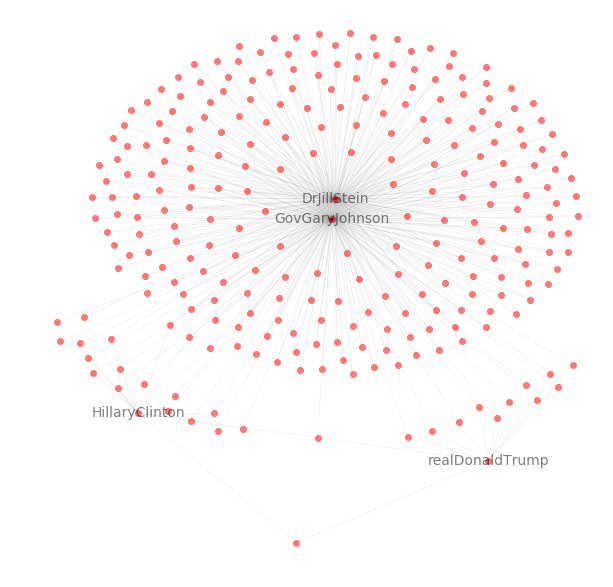

network drawn to network.png


In [20]:
def main():
    """ Main method. You should not modify this. """
    twitter = get_twitter()
    screen_names = read_screen_names('candidates.txt')
    print('Established Twitter connection.')
    print('Read screen names: %s' % screen_names)
    users = sorted(get_users(twitter, screen_names), key=lambda x: x['screen_name'])
    print('found %d users with screen_names %s' %
          (len(users), str([u['screen_name'] for u in users])))
    add_all_friends(twitter, users)
    print('Friends per candidate:')
    print_num_friends(users)
    friend_counts = count_friends(users)
    print('Most common friends:\n%s' % str(friend_counts.most_common(5)))
    print('Friend Overlap:\n%s' % str(friend_overlap(users)))
    print('User followed by Hillary and Donald: %s' % str(followed_by_hillary_and_donald(users, twitter)))

    graph = create_graph(users, friend_counts)
    print('graph has %s nodes and %s edges' % (len(graph.nodes()), len(graph.edges())))
    draw_network(graph, users, 'network.png')
    print('network drawn to network.png')

if __name__ == '__main__':
    main()